# 10分钟入门Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 对象创建

通过传入一些值的列表来创建一个Series， pandas会自动创建一个默认的整数索引：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递带有日期时间索引和带标签列的NumPy数组来创建DataFrame：

In [3]:
dates = pd.date_range('20190623',periods=6)
dates

DatetimeIndex(['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', freq='D')

In [4]:
list('ABCD')

['A', 'B', 'C', 'D']

In [5]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


通过传递可以转化为类似Series的dict对象来创建DataFrame:

In [6]:
pd.Series(1,index=list(range(4)),dtype='float32')

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32

In [7]:
np.array([3] * 4,dtype='int32')

array([3, 3, 3, 3], dtype=int32)

In [8]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20190624'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3]*4,dtype='int32'),
    'E' : pd.Categorical(['test','train','test','train']),
    'F' : 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2019-06-24,1.0,3,test,foo
1,1.0,2019-06-24,1.0,3,train,foo
2,1.0,2019-06-24,1.0,3,test,foo
3,1.0,2019-06-24,1.0,3,train,foo


DataFrame的列具有不同的数据类型：

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

如果你正在使用 IPython, 按下tab键会自动补全所有的列名以及公共属性。下面是可以补全的属性中的一部分：

In [10]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

# 查看数据

这里展示的是如何查看DataFrame顶部和尾部的数据：

In [11]:
df.head()

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152


In [12]:
df.tail()

,A,B,C,D
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


显示索引、列和底层NumPy数据：

In [13]:
df.index

DatetimeIndex(['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


describe() 方法显示数据的快速统计摘要：

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.163999,0.102037,0.155420,0.153010
std,0.935979,0.941757,1.168373,1.580117
min,-1.188372,-1.215303,-0.738672,-1.080152
25%,-0.315223,-0.321956,-0.314049,-0.825627
50%,0.076024,-0.084818,-0.266727,-0.725035
75%,0.951364,0.835129,-0.029756,1.058386
max,1.222813,1.256383,2.485237,2.654581


转置数据：

In [17]:
df.T

,2019-06-23 00:00:00,2019-06-24 00:00:00,2019-06-25 00:00:00,2019-06-26 00:00:00,2019-06-27 00:00:00,2019-06-28 00:00:00
A,1.126148,-0.274966,-1.188372,1.222813,-0.328642,0.427014
B,-1.215303,-0.387776,1.256383,1.128552,-0.124496,-0.045140
C,-0.321024,-0.240333,2.485237,-0.293121,0.040437,-0.738672
D,2.654581,-0.651858,-0.798211,-0.834765,-1.080152,1.628468


按轴排序：

In [18]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2019-06-23,2.654581,-0.321024,-1.215303,1.126148
2019-06-24,-0.651858,-0.240333,-0.387776,-0.274966
2019-06-25,-0.798211,2.485237,1.256383,-1.188372
2019-06-26,-0.834765,-0.293121,1.128552,1.222813
2019-06-27,-1.080152,0.040437,-0.124496,-0.328642
2019-06-28,1.628468,-0.738672,-0.045140,0.427014


按值排序：

In [19]:
df.sort_values(by='B')

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-25,-1.188372,1.256383,2.485237,-0.798211


# 选择

**注意**：虽然用于选择和赋值的标准Python / Numpy表达式非常直观，并且便于交互工作，但是对于生产环境的代码，我们推荐优化的pandas数据访问方法.at、.iat、.loc和.iloc。

参见索引文档索引、选择数据和多索引/高级索引。

## 入门

选择一个列，产生一个“Series”，相当于“df.A”:

In [20]:
df['A']

2019-06-23    1.126148
2019-06-24   -0.274966
2019-06-25   -1.188372
2019-06-26    1.222813
2019-06-27   -0.328642
2019-06-28    0.427014
Freq: D, Name: A, dtype: float64

通过[ ]选择，对行进行切片：

In [21]:
df[0:3]

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211


In [22]:
df['20190625':'20190627']

,A,B,C,D
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152


通过标签选择

In [23]:
dates

DatetimeIndex(['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', freq='D')

In [24]:
dates[0]

Timestamp('2019-06-23 00:00:00', freq='D')

In [25]:
df.loc[dates[0]]

A    1.126148
B   -1.215303
C   -0.321024
D    2.654581
Name: 2019-06-23 00:00:00, dtype: float64

通过标签在多个轴上选择数据：

In [26]:
df.loc[:,['A','B']]

,A,B
2019-06-23,1.126148,-1.215303
2019-06-24,-0.274966,-0.387776
2019-06-25,-1.188372,1.256383
2019-06-26,1.222813,1.128552
2019-06-27,-0.328642,-0.124496
2019-06-28,0.427014,-0.045140


通过标签同时在两个轴上切片：

In [27]:
df.loc['20190623':'20190625',['A','B']]

,A,B
2019-06-23,1.126148,-1.215303
2019-06-24,-0.274966,-0.387776
2019-06-25,-1.188372,1.256383


减小返回对象的大小：

In [28]:
df.loc['20190623',['A','B']]

A    1.126148
B   -1.215303
Name: 2019-06-23 00:00:00, dtype: float64

获取标量值

In [29]:
df.loc[dates[0],['A']]

A    1.126148
Name: 2019-06-23 00:00:00, dtype: float64

快速访问标量(和上面的方法效果相同)：

In [30]:
df.at[dates[0],'A']

1.1261478095255817

# 按位置选择

通过传递的整数的位置选择：

In [31]:
df

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


In [32]:
df.iloc[3]

A    1.222813
B    1.128552
C   -0.293121
D   -0.834765
Name: 2019-06-26 00:00:00, dtype: float64

通过整数切片，类似于numpy/Python：

In [33]:
df.iloc[3:5,0:2]

,A,B
2019-06-26,1.222813,1.128552
2019-06-27,-0.328642,-0.124496


通过传递整数的列表按位置切片，类似于numpy/Python：

In [34]:
df.iloc[[1,3,4],[0,2]]

,A,C
2019-06-24,-0.274966,-0.240333
2019-06-26,1.222813,-0.293121
2019-06-27,-0.328642,0.040437


整行切片：

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211


整列切片：

In [36]:
df.iloc[:,1:3]

,B,C
2019-06-23,-1.215303,-0.321024
2019-06-24,-0.387776,-0.240333
2019-06-25,1.256383,2.485237
2019-06-26,1.128552,-0.293121
2019-06-27,-0.124496,0.040437
2019-06-28,-0.045140,-0.738672


获取具体值:

In [37]:
df

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


In [38]:
df.iloc[1,1]

-0.38777613695983365

快速访问标量(等价于之前的方法)：

In [39]:
df.iat[1,1]

-0.38777613695983365

# 布尔索引

使用单个列的值来选择数据：

In [40]:
df[df.A > 0]

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


从满足布尔条件的DataFrame中选择值：

In [41]:
df

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


In [42]:
df[df > 0]

,A,B,C,D
2019-06-23,1.126148,NaN,NaN,2.654581
2019-06-24,NaN,NaN,NaN,NaN
2019-06-25,NaN,1.256383,2.485237,NaN
2019-06-26,1.222813,1.128552,NaN,NaN
2019-06-27,NaN,NaN,0.040437,NaN
2019-06-28,0.427014,NaN,NaN,1.628468


使用 isin() 方法过滤：

In [43]:
df2 = df.copy()
df2

,A,B,C,D
2019-06-23,1.126148,-1.215303,-0.321024,2.654581
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858
2019-06-25,-1.188372,1.256383,2.485237,-0.798211
2019-06-26,1.222813,1.128552,-0.293121,-0.834765
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152
2019-06-28,0.427014,-0.045140,-0.738672,1.628468


In [44]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2019-06-23,1.126148,-1.215303,-0.321024,2.654581,one
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858,one
2019-06-25,-1.188372,1.256383,2.485237,-0.798211,two
2019-06-26,1.222813,1.128552,-0.293121,-0.834765,three
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152,four
2019-06-28,0.427014,-0.045140,-0.738672,1.628468,three


In [45]:
df2['E'].isin(['two','four'])

2019-06-23    False
2019-06-24    False
2019-06-25     True
2019-06-26    False
2019-06-27     True
2019-06-28    False
Freq: D, Name: E, dtype: bool

In [46]:
isindf2 = df2.isin(['two','three'])

In [47]:
df2[isindf2]

,A,B,C,D,E
2019-06-23,NaN,NaN,NaN,NaN,NaN
2019-06-24,NaN,NaN,NaN,NaN,NaN
2019-06-25,NaN,NaN,NaN,NaN,two
2019-06-26,NaN,NaN,NaN,NaN,three
2019-06-27,NaN,NaN,NaN,NaN,NaN
2019-06-28,NaN,NaN,NaN,NaN,three


In [48]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2019-06-25,-1.188372,1.256383,2.485237,-0.798211,two
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152,four


## 赋值

添加新列将自动根据索引对齐数据：

In [49]:
s1 = pd.Series([1,2,3,4,5,6], index =pd.date_range('20190623',periods=6))
s1

2019-06-23    1
2019-06-24    2
2019-06-25    3
2019-06-26    4
2019-06-27    5
2019-06-28    6
Freq: D, dtype: int64

In [50]:
df['F'] = s1
df

,A,B,C,D,F
2019-06-23,1.126148,-1.215303,-0.321024,2.654581,1
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858,2
2019-06-25,-1.188372,1.256383,2.485237,-0.798211,3
2019-06-26,1.222813,1.128552,-0.293121,-0.834765,4
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152,5
2019-06-28,0.427014,-0.045140,-0.738672,1.628468,6


通过标签赋值：

In [51]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2019-06-23,0.000000,-1.215303,-0.321024,2.654581,1
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858,2
2019-06-25,-1.188372,1.256383,2.485237,-0.798211,3
2019-06-26,1.222813,1.128552,-0.293121,-0.834765,4
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152,5
2019-06-28,0.427014,-0.045140,-0.738672,1.628468,6


通过位置赋值：

In [52]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,2.654581,1
2019-06-24,-0.274966,-0.387776,-0.240333,-0.651858,2
2019-06-25,-1.188372,1.256383,2.485237,-0.798211,3
2019-06-26,1.222813,1.128552,-0.293121,-0.834765,4
2019-06-27,-0.328642,-0.124496,0.040437,-1.080152,5
2019-06-28,0.427014,-0.045140,-0.738672,1.628468,6


使用NumPy数组赋值：

In [53]:
len(df)

6

In [54]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


前面一系列赋值操作的结果：

In [55]:
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


带有where条件的赋值操作：

In [56]:
df2 = df.copy()
df2

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


In [57]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,-5,-1
2019-06-24,-0.274966,-0.387776,-0.240333,-5,-2
2019-06-25,-1.188372,-1.256383,-2.485237,-5,-3
2019-06-26,-1.222813,-1.128552,-0.293121,-5,-4
2019-06-27,-0.328642,-0.124496,-0.040437,-5,-5
2019-06-28,-0.427014,-0.045140,-0.738672,-5,-6


# 缺失值

pandas主要使用值np.nan来表示缺失的数据。 默认情况下，它不包含在计算中。 在 Missing Data section中查看更多。

重建索引允许你更改/添加/删除指定轴上的索引。 这个操作会返回一个副本(不会更改原来的对象)。

In [58]:
dates[0:4]

DatetimeIndex(['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26'], dtype='datetime64[ns]', freq='D')

In [59]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [60]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1

,A,B,C,D,F,E
2019-06-23,0.000000,0.000000,-0.321024,5,1,NaN
2019-06-24,-0.274966,-0.387776,-0.240333,5,2,NaN
2019-06-25,-1.188372,1.256383,2.485237,5,3,NaN
2019-06-26,1.222813,1.128552,-0.293121,5,4,NaN


In [61]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2019-06-23,0.000000,0.000000,-0.321024,5,1,1.0
2019-06-24,-0.274966,-0.387776,-0.240333,5,2,1.0
2019-06-25,-1.188372,1.256383,2.485237,5,3,NaN
2019-06-26,1.222813,1.128552,-0.293121,5,4,NaN


删除任何带有缺失值的行：

In [62]:
df1.dropna(how='any')

,A,B,C,D,F,E
2019-06-23,0.000000,0.000000,-0.321024,5,1,1.0
2019-06-24,-0.274966,-0.387776,-0.240333,5,2,1.0


填充缺失值：

In [63]:
df1.fillna(value=5)

,A,B,C,D,F,E
2019-06-23,0.000000,0.000000,-0.321024,5,1,1.0
2019-06-24,-0.274966,-0.387776,-0.240333,5,2,1.0
2019-06-25,-1.188372,1.256383,2.485237,5,3,5.0
2019-06-26,1.222813,1.128552,-0.293121,5,4,5.0


获取值为nan的掩码：

In [64]:
pd.isna(df1)

,A,B,C,D,F,E
2019-06-23,False,False,False,False,False,False
2019-06-24,False,False,False,False,False,False
2019-06-25,False,False,False,False,False,True
2019-06-26,False,False,False,False,False,True


# 操作

## 统计

在一些操作中经常会排除缺失值。

进行描述性统计：

In [65]:
df1

,A,B,C,D,F,E
2019-06-23,0.000000,0.000000,-0.321024,5,1,1.0
2019-06-24,-0.274966,-0.387776,-0.240333,5,2,1.0
2019-06-25,-1.188372,1.256383,2.485237,5,3,NaN
2019-06-26,1.222813,1.128552,-0.293121,5,4,NaN


In [66]:
df1.mean()

A   -0.060131
B    0.499290
C    0.407690
D    5.000000
F    2.500000
E    1.000000
dtype: float64

在其它轴(行)上进行同样的操作：

In [67]:
df.mean(axis=1)

2019-06-23    1.135795
2019-06-24    1.219385
2019-06-25    2.110650
2019-06-26    2.211649
2019-06-27    1.917460
2019-06-28    2.128640
Freq: D, dtype: float64

使用具有不同维度且需要对齐的对象进行操作。 此外，pandas会自动沿指定维度进行广播。

In [68]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2019-06-23    1.0
2019-06-24    3.0
2019-06-25    5.0
2019-06-26    NaN
2019-06-27    6.0
2019-06-28    8.0
Freq: D, dtype: float64

In [69]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2019-06-23    NaN
2019-06-24    NaN
2019-06-25    1.0
2019-06-26    3.0
2019-06-27    5.0
2019-06-28    NaN
Freq: D, dtype: float64

In [70]:
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


In [71]:
df.sub(s,axis='index')

,A,B,C,D,F
2019-06-23,NaN,NaN,NaN,NaN,NaN
2019-06-24,NaN,NaN,NaN,NaN,NaN
2019-06-25,-2.188372,0.256383,1.485237,4.0,2.0
2019-06-26,-1.777187,-1.871448,-3.293121,2.0,1.0
2019-06-27,-5.328642,-5.124496,-4.959563,0.0,0.0
2019-06-28,NaN,NaN,NaN,NaN,NaN


# 应用(Apply)

将函数应用于数据：



In [72]:
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


In [73]:
df.apply(np.cumsum)

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.561358,10,3
2019-06-25,-1.463338,0.868607,1.923879,15,6
2019-06-26,-0.240525,1.997159,1.630758,20,10
2019-06-27,-0.569167,1.872663,1.671195,25,15
2019-06-28,-0.142154,1.827523,0.932523,30,21


In [74]:
df

,A,B,C,D,F
2019-06-23,0.000000,0.000000,-0.321024,5,1
2019-06-24,-0.274966,-0.387776,-0.240333,5,2
2019-06-25,-1.188372,1.256383,2.485237,5,3
2019-06-26,1.222813,1.128552,-0.293121,5,4
2019-06-27,-0.328642,-0.124496,0.040437,5,5
2019-06-28,0.427014,-0.045140,-0.738672,5,6


In [75]:
df.apply(lambda x: x.max()-x.min())

A    2.411184
B    1.644159
C    3.223909
D    0.000000
F    5.000000
dtype: float64

# 直方图化


In [76]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    6
2    3
3    4
4    4
5    2
6    0
7    2
8    1
9    2
dtype: int64

In [77]:
s.value_counts()

2    3
4    2
3    2
6    1
1    1
0    1
dtype: int64

# 字符串方法

Series在str属性中配备了一组字符串处理方法，可以轻松地对数组的每个元素进行操作，如下面的代码片段所示。 请注意，str中的模式匹配中默认情况下通常使用正则表达式。 请参阅Vectorized String Methods。

In [78]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [79]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并(Merge)


## 连接(Concat)

pandas提供了各种工具，可以轻松地将Series，DataFrame和Panel对象与各种赋值逻辑组合在一起，用于索引和连接/合并类型操作时的关系代数功能。

在 Merging section查看更多。

使用 concat()连接pandas对象：

In [80]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.060096,0.573378,-0.077785,-0.842308
1,-1.023047,0.329918,2.483618,2.543865
2,2.446268,-0.853534,-0.208115,1.467575
3,-1.088421,0.581428,0.366971,-0.546577
4,-1.212643,0.104665,-0.097614,-1.255214
5,0.497320,-1.072118,-0.583144,1.460256
6,-1.317962,-0.638705,0.951300,-2.188439
7,-0.863691,-0.395243,-0.113402,0.191726
8,-0.692749,0.811621,0.157283,-0.121668
9,1.398182,0.520734,1.749929,0.918647


In [81]:
df[:3]

,0,1,2,3
0,1.060096,0.573378,-0.077785,-0.842308
1,-1.023047,0.329918,2.483618,2.543865
2,2.446268,-0.853534,-0.208115,1.467575


In [82]:
df[3:7]

,0,1,2,3
3,-1.088421,0.581428,0.366971,-0.546577
4,-1.212643,0.104665,-0.097614,-1.255214
5,0.497320,-1.072118,-0.583144,1.460256
6,-1.317962,-0.638705,0.951300,-2.188439


In [83]:
pieces=[df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  1.060096  0.573378 -0.077785 -0.842308
 1 -1.023047  0.329918  2.483618  2.543865
 2  2.446268 -0.853534 -0.208115  1.467575,
           0         1         2         3
 3 -1.088421  0.581428  0.366971 -0.546577
 4 -1.212643  0.104665 -0.097614 -1.255214
 5  0.497320 -1.072118 -0.583144  1.460256
 6 -1.317962 -0.638705  0.951300 -2.188439,
           0         1         2         3
 7 -0.863691 -0.395243 -0.113402  0.191726
 8 -0.692749  0.811621  0.157283 -0.121668
 9  1.398182  0.520734  1.749929  0.918647]

In [84]:
pd.concat(pieces)

,0,1,2,3
0,1.060096,0.573378,-0.077785,-0.842308
1,-1.023047,0.329918,2.483618,2.543865
2,2.446268,-0.853534,-0.208115,1.467575
3,-1.088421,0.581428,0.366971,-0.546577
4,-1.212643,0.104665,-0.097614,-1.255214
5,0.497320,-1.072118,-0.583144,1.460256
6,-1.317962,-0.638705,0.951300,-2.188439
7,-0.863691,-0.395243,-0.113402,0.191726
8,-0.692749,0.811621,0.157283,-0.121668
9,1.398182,0.520734,1.749929,0.918647


# Join

SQL风格的合并。 请参阅数据库样式连接部分。

In [85]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [86]:
left

,key,lval
0,foo,1
1,foo,2


In [87]:
right

,key,rval
0,foo,4
1,foo,5


In [88]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


另一个例子是：

In [89]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [90]:
left

,key,lval
0,foo,1
1,bar,2


In [91]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [92]:
right

,key,rval
0,foo,4
1,bar,5


In [93]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 追加(Append)

In [94]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.931332,0.452354,1.006893,0.119264
1,0.329296,0.841744,-0.015705,-1.669124
2,0.113328,0.072313,0.494160,1.292242
3,0.038604,-0.680947,-0.633905,-0.375396
4,-0.829894,1.834863,0.702348,-0.338278
5,0.701735,-0.214779,0.090763,0.506172
6,2.164061,0.641346,-0.612825,-1.045583
7,0.750546,-0.573296,-2.153022,0.248078


In [95]:
df

,A,B,C,D
0,-0.931332,0.452354,1.006893,0.119264
1,0.329296,0.841744,-0.015705,-1.669124
2,0.113328,0.072313,0.494160,1.292242
3,0.038604,-0.680947,-0.633905,-0.375396
4,-0.829894,1.834863,0.702348,-0.338278
5,0.701735,-0.214779,0.090763,0.506172
6,2.164061,0.641346,-0.612825,-1.045583
7,0.750546,-0.573296,-2.153022,0.248078


In [96]:
s = df.iloc[3]
s

A    0.038604
B   -0.680947
C   -0.633905
D   -0.375396
Name: 3, dtype: float64

In [97]:
s = df.append(s,ignore_index=True)
s

,A,B,C,D
0,-0.931332,0.452354,1.006893,0.119264
1,0.329296,0.841744,-0.015705,-1.669124
2,0.113328,0.072313,0.494160,1.292242
3,0.038604,-0.680947,-0.633905,-0.375396
4,-0.829894,1.834863,0.702348,-0.338278
5,0.701735,-0.214779,0.090763,0.506172
6,2.164061,0.641346,-0.612825,-1.045583
7,0.750546,-0.573296,-2.153022,0.248078
8,0.038604,-0.680947,-0.633905,-0.375396


# 分组(Grouping)

我们所说的“group by“是指涉及下列一项或多项步骤的程序：

- Splitting：根据一些标准将数据分解成组
- Applying：将函数独立地应用于每个组
- Combining：将结果组合成数据结构

In [98]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [99]:
df

,A,B,C,D
0,foo,one,2.042504,0.268897
1,bar,one,1.502968,0.828338
2,foo,two,0.249604,-0.245022
3,bar,three,-1.648057,0.913084
4,foo,two,-1.158827,0.544396
5,bar,two,0.135659,0.170779
6,foo,one,0.062054,1.934165
7,foo,three,1.403652,-0.664435


分组，然后将sum()函数应用于分组结果：

In [100]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.009430,1.912201
foo,2.598988,1.838000


# 重塑(Reshaping)


## 堆叠(Stack)

In [101]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [102]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [103]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df

A         B
first second                    
bar   one     0.911195 -0.241073
      two    -0.435304 -1.250157
baz   one     1.449961  0.382423
      two    -0.951152  0.238789
foo   one    -0.922290 -0.559799
      two    -1.131267 -0.593628
qux   one    -0.399315  0.702192
      two     1.224251  2.015674

In [104]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.911195 -0.241073
      two    -0.435304 -1.250157
baz   one     1.449961  0.382423
      two    -0.951152  0.238789

stack()方法压缩DataFrame的列：

In [105]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.911195
               B   -0.241073
       two     A   -0.435304
               B   -1.250157
baz    one     A    1.449961
               B    0.382423
       two     A   -0.951152
               B    0.238789
dtype: float64

“压缩”后的DataFrame或Series(具有MultiIndex作为索引)， stack() 的逆操作是unstack()，默认情况下取消最后压缩的那个级别：

In [106]:
stacked.unstack()

A         B
first second                    
bar   one     0.911195 -0.241073
      two    -0.435304 -1.250157
baz   one     1.449961  0.382423
      two    -0.951152  0.238789

In [107]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.911195 -0.435304
      B -0.241073 -1.250157
baz   A  1.449961 -0.951152
      B  0.382423  0.238789

In [108]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.911195  1.449961
       B -0.241073  0.382423
two    A -0.435304 -0.951152
       B -1.250157  0.238789

# 数据透视表(PivotTables)

In [109]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)}) 
df

,A,B,C,D,E
0,one,A,foo,-1.019253,0.472905
1,one,B,foo,-0.341987,-1.069613
2,two,C,foo,-1.446903,0.013453
3,three,A,bar,-0.286675,-1.297695
4,one,B,bar,-0.021182,0.461275
5,one,C,bar,-0.092261,-1.391558
6,two,A,foo,1.238549,0.666818
7,three,B,foo,1.373144,-0.629110
8,one,C,foo,-1.022652,0.129340
9,one,A,bar,-0.434719,-0.053188


我们可以非常轻松地从这些数据生成数据透视表：

In [110]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.434719 -1.019253
      B -0.021182 -0.341987
      C -0.092261 -1.022652
three A -0.286675       NaN
      B       NaN  1.373144
      C -0.078370       NaN
two   A       NaN  1.238549
      B -1.563549       NaN
      C       NaN -1.446903

# 时间序列(TimeSeries)

pandas具有简单，强大且高效的功能，用于在频率转换期间执行重采样操作(例如，将第二数据转换为5分钟数据)。 这在财务应用程序中非常常见，但不仅限于此。请参阅Time Series section部分。

In [111]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [112]:
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2012-01-01 00:00:00     40
2012-01-01 00:00:01    378
2012-01-01 00:00:02    447
2012-01-01 00:00:03    459
2012-01-01 00:00:04    347
2012-01-01 00:00:05    222
2012-01-01 00:00:06    350
2012-01-01 00:00:07    261
2012-01-01 00:00:08    276
2012-01-01 00:00:09    375
2012-01-01 00:00:10    112
2012-01-01 00:00:11    382
2012-01-01 00:00:12    104
2012-01-01 00:00:13    393
2012-01-01 00:00:14      2
2012-01-01 00:00:15    118
2012-01-01 00:00:16    307
2012-01-01 00:00:17    191
2012-01-01 00:00:18     63
2012-01-01 00:00:19    310
2012-01-01 00:00:20    286
2012-01-01 00:00:21    428
2012-01-01 00:00:22    480
2012-01-01 00:00:23    250
2012-01-01 00:00:24    153
2012-01-01 00:00:25    359
2012-01-01 00:00:26    283
2012-01-01 00:00:27    346
2012-01-01 00:00:28    457
2012-01-01 00:00:29    401
                      ... 
2012-01-01 00:01:10     98
2012-01-01 00:01:11    373
2012-01-01 00:01:12    353
2012-01-01 00:01:13    147
2012-01-01 00:01:14     49
2012-01-01 00:01:15    338
2

In [113]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    16701
2012-01-01 00:01:00     9606
Freq: T, dtype: int64

In [114]:
ts.resample('0.5Min').sum()

2012-01-01 00:00:00    8580
2012-01-01 00:00:30    8121
2012-01-01 00:01:00    6966
2012-01-01 00:01:30    2640
Freq: 30S, dtype: int64

时区代表：

In [115]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [116]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    2.093082
2012-03-07   -0.357030
2012-03-08   -0.789928
2012-03-09    0.593985
2012-03-10    1.017442
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    2.093082
2012-03-07 00:00:00+00:00   -0.357030
2012-03-08 00:00:00+00:00   -0.789928
2012-03-09 00:00:00+00:00    0.593985
2012-03-10 00:00:00+00:00    1.017442
Freq: D, dtype: float64

转换为另一个时区：

In [118]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.093082
2012-03-06 19:00:00-05:00   -0.357030
2012-03-07 19:00:00-05:00   -0.789928
2012-03-08 19:00:00-05:00    0.593985
2012-03-09 19:00:00-05:00    1.017442
Freq: D, dtype: float64

在时间跨度表示之间转换：

In [119]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [120]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31   -0.368605
2012-02-29    0.376260
2012-03-31    2.053725
2012-04-30   -1.627875
2012-05-31    0.358509
Freq: M, dtype: float64

In [121]:
ps = ts.to_period()
ps

2012-01   -0.368605
2012-02    0.376260
2012-03    2.053725
2012-04   -1.627875
2012-05    0.358509
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01   -0.368605
2012-02-01    0.376260
2012-03-01    2.053725
2012-04-01   -1.627875
2012-05-01    0.358509
Freq: MS, dtype: float64

周期和时间戳之间的转换可以使用一些方便的算术函数。在下面的例子中，我们将一个以11月为结束年份的季度频率转换为季度结束后一个月末的上午9点：

# 分类(Categoricals)

pandas可以在DataFrame中包含分类数据。

In [123]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


将原始成绩转换为category数据类型：

In [124]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [125]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别重命名为更有意义的名称(通过调用Series.cat.categories来替换！)。

In [126]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [127]:
df['raw_grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

对categories重新排序并同时添加缺少的category(Series.cat下的方法默认返回一个新的Series)。

In [128]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [129]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按categories中的顺序排序，而不是词汇顺序：

In [130]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按分好类的列分组(groupby)可以显示空categories：

In [131]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 绘图

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01    0.078732
2000-01-02    0.805658
2000-01-03    0.328632
2000-01-04    0.229384
2000-01-05   -0.829262
Freq: D, dtype: float64

In [138]:
ts.describe()

count    1000.000000
mean       -0.010891
std         0.996391
min        -4.782495
25%        -0.707663
50%         0.003245
75%         0.596067
max         3.353074
dtype: float64

In [140]:
ts = ts.cumsum()

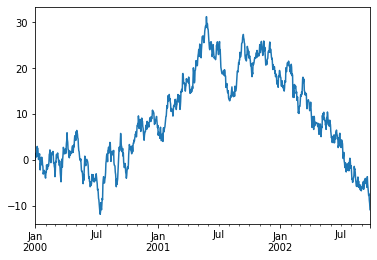

In [141]:
ts.plot()

In [143]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

### 在一个DataFrame中, plot() 方法可以方便地绘制带有label的所有列：

In [144]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [149]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

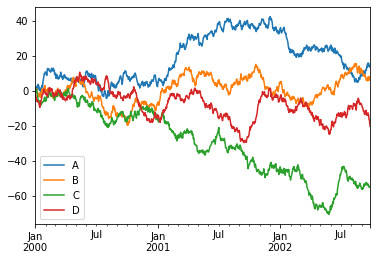

In [155]:
plt.clf()
plt.figure(figsize=(20,20))
df.plot()
plt.legend(loc='best')

# CSV

写入CSV文件。

```python
df.to_csv('foo.csv')
```

从CSV文件读数据。

```python
pd.read_csv('foo.csv')
```

```
     Unnamed: 0          A          B         C          D
0    2000-01-01   0.266457  -0.399641 -0.219582   1.186860
1    2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2    2000-01-03  -1.734933   0.530468  2.060811  -0.515536
3    2000-01-04  -1.555121   1.452620  0.239859  -1.156896
4    2000-01-05   0.578117   0.511371  0.103552  -2.428202
5    2000-01-06   0.478344   0.449933 -0.741620  -1.962409
6    2000-01-07   1.235339  -0.091757 -1.543861  -1.084753
..          ...        ...        ...       ...        ...
993  2002-09-20 -10.628548  -9.153563 -7.883146  28.313940
994  2002-09-21 -10.390377  -8.727491 -6.399645  30.914107
995  2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
996  2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
997  2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
998  2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
999  2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 5 columns]
```

# HDF5

请参阅HDFStores。

写入HDF5：

```python
df.to_hdf('foo.h5','df')
```

从HDF5读数据：.

```python
pd.read_hdf('foo.h5','df')
```

```
                    A          B         C          D
2000-01-01   0.266457  -0.399641 -0.219582   1.186860
2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2000-01-03  -1.734933   0.530468  2.060811  -0.515536
2000-01-04  -1.555121   1.452620  0.239859  -1.156896
2000-01-05   0.578117   0.511371  0.103552  -2.428202
2000-01-06   0.478344   0.449933 -0.741620  -1.962409
2000-01-07   1.235339  -0.091757 -1.543861  -1.084753
...               ...        ...       ...        ...
2002-09-20 -10.628548  -9.153563 -7.883146  28.313940
2002-09-21 -10.390377  -8.727491 -6.399645  30.914107
2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 4 columns]
```

# Excel

请参阅MS Excel。

写入excel文件：

```python
df.to_excel('foo.xlsx', sheet_name='Sheet1')
```

```python
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
```
```
                    A          B         C          D
2000-01-01   0.266457  -0.399641 -0.219582   1.186860
2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2000-01-03  -1.734933   0.530468  2.060811  -0.515536
2000-01-04  -1.555121   1.452620  0.239859  -1.156896
2000-01-05   0.578117   0.511371  0.103552  -2.428202
2000-01-06   0.478344   0.449933 -0.741620  -1.962409
2000-01-07   1.235339  -0.091757 -1.543861  -1.084753
...               ...        ...       ...        ...
2002-09-20 -10.628548  -9.153563 -7.883146  28.313940
2002-09-21 -10.390377  -8.727491 -6.399645  30.914107
2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 4 columns]
```

# 陷阱(Gotchas)

如果你试图执行一个操作，你可能会看到一个异常，如:

```python
>>> if pd.Series([False, True, False]):
    print("I was true")
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
    ```